In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("SuperstoreCanada.xlsx")

In [3]:
df.shape

(9994, 21)

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# Going to Drop unwanted columns:-

In [7]:
df.drop(["Row ID","Ship Date","Customer Name","Quantity","Customer ID","City","State","Country","Postal Code","Product ID","Product Name"],axis = 1,inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Ship Mode     9994 non-null   object        
 3   Segment       9994 non-null   object        
 4   Region        9994 non-null   object        
 5   Category      9994 non-null   object        
 6   Sub-Category  9994 non-null   object        
 7   Sales         9994 non-null   float64       
 8   Discount      9994 non-null   float64       
 9   Profit        9994 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 780.9+ KB


# Extracting "Month" and "Year" from "Order_date"

In [11]:
df["Order_Month"] = df["Order Date"].dt.strftime('%B')
df["Order_year"] = df["Order Date"].dt.year

In [12]:
df.drop(["Order Date"],axis = 1,inplace = True)

In [28]:
df.head(2)

,Order ID,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Discount,Profit,Order_Month,Order_year
0,CA-2016-152156,Second Class,Consumer,South,Furniture,Bookcases,261,0,41,November,2016
1,CA-2016-152156,Second Class,Consumer,South,Furniture,Chairs,731,0,219,November,2016


In [29]:
df.tail(2)

,Order ID,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Discount,Profit,Order_Month,Order_year
9992,CA-2017-121258,Standard Class,Consumer,West,Office Supplies,Paper,29,0,13,February,2017
9993,CA-2017-119914,Second Class,Consumer,West,Office Supplies,Appliances,243,0,72,May,2017


# Change datatype from "float" to "int"

In [14]:
df[["Sales","Discount","Profit"]] = df[["Sales","Discount","Profit"]].astype(int)

In [15]:
df.isnull().sum()

Order ID        0
Ship Mode       0
Segment         0
Region          0
Category        0
Sub-Category    0
Sales           0
Discount        0
Profit          0
Order_Month     0
Order_year      0
dtype: int64

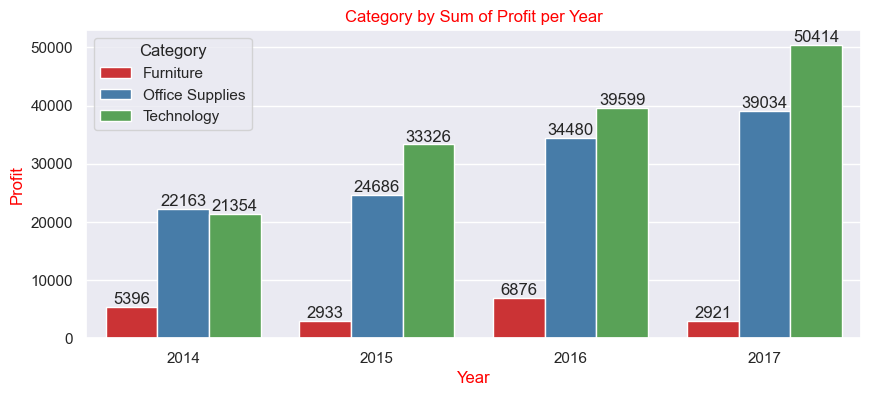

In [16]:
data = df.groupby(["Order_year","Category"],as_index = False)["Profit"].sum()
sns.set(rc = {"figure.figsize":(10,4)})
x = sns.barplot(x = "Order_year",y = "Profit",hue = "Category",palette = "Set1",data = data)
for i in x.containers:
    x.bar_label(i)
plt.title("Category by Sum of Profit per Year",color = "red")
plt.xlabel("Year",color = "red")
plt.ylabel("Profit",color = "red")
plt.show()

# In above chart we get, "Profit" in "Technology" Increase 2-times in last 3-years.
# "Office Supplies" also perform very well
# But "Furniture" do not perform good it decrease from last year.

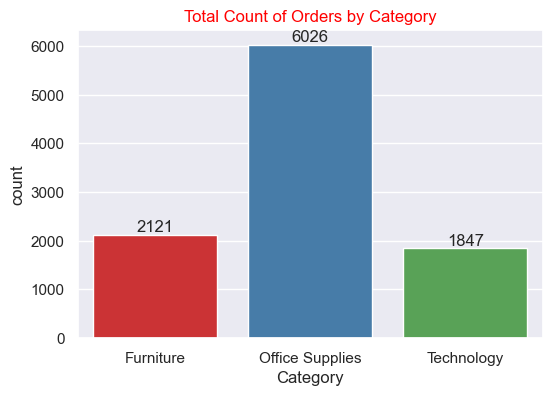

In [17]:
sns.set(rc = {"figure.figsize":(6,4)})
x = sns.countplot(x = "Category",hue = "Category",palette = "Set1",data = df,legend = False)
for i in x.containers:
    x.bar_label(i)
plt.title("Total Count of Orders by Category",color = "red")
plt.show()

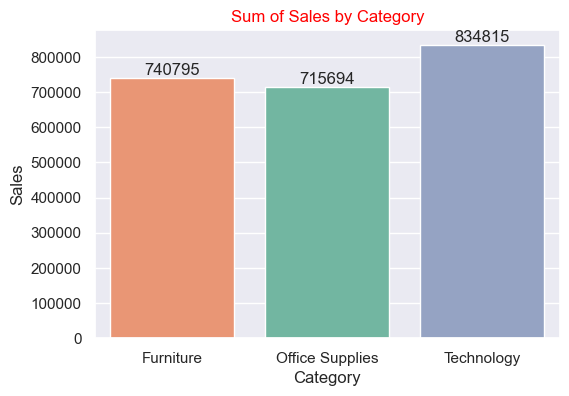

In [18]:
cat_sales = df.groupby("Category",as_index = False)["Sales"].sum()
sns.set(rc = {"figure.figsize":(6,4)})
x = sns.barplot(x = "Category",y = "Sales",hue = "Sales",palette = "Set2",legend = False,data = cat_sales)
for i in x.containers:
    x.bar_label(i)
plt.title("Sum of Sales by Category",color = "red")
plt.show()

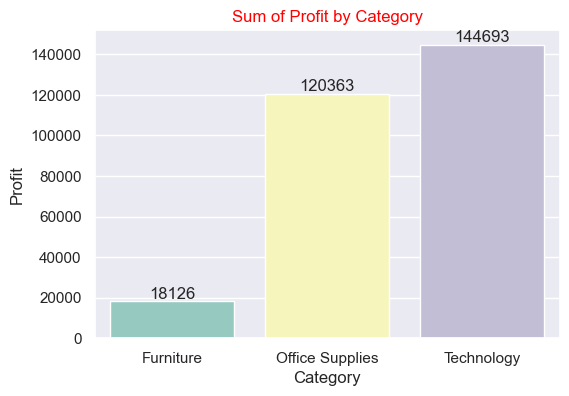

In [19]:
cat_profit = df.groupby("Category",as_index = False)["Profit"].sum()
sns.set(rc = {"figure.figsize":(6,4)})
x = sns.barplot(x = "Category",y = "Profit",hue = "Profit",palette = "Set3",legend = False,data = cat_profit)
for i in x.containers:
    x.bar_label(i)
plt.title("Sum of Profit by Category",color = "red")
plt.show()

# Acording to above 3-charts we can say that comapany got high order of "Office Supplies". And "Technology" got less orders in all "Category" in last 4-years.
# But Profit from "Technology" is 8-times more than "Furniture" and also greater than "Office Supplies" in last 4-years .

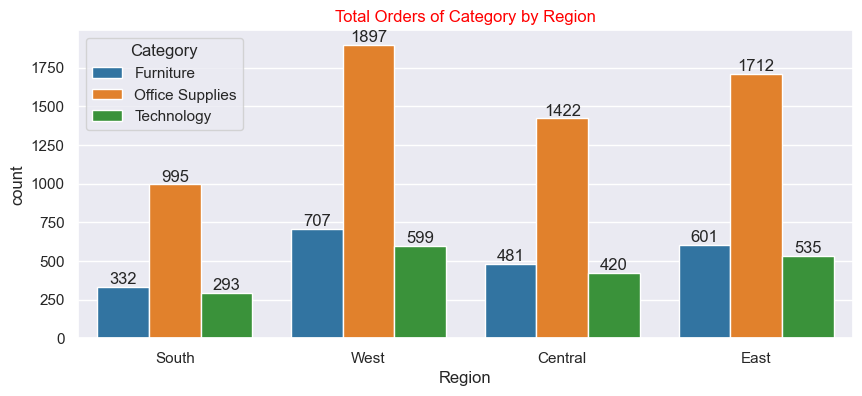

In [20]:
sns.set(rc = {"figure.figsize":(10,4)})
ax = sns.countplot(x = "Region",hue = "Category",data = df,palette = "tab10")
for i in ax.containers:
    ax.bar_label(i)
plt.title("Total Orders of Category by Region",color = "red")
plt.show()

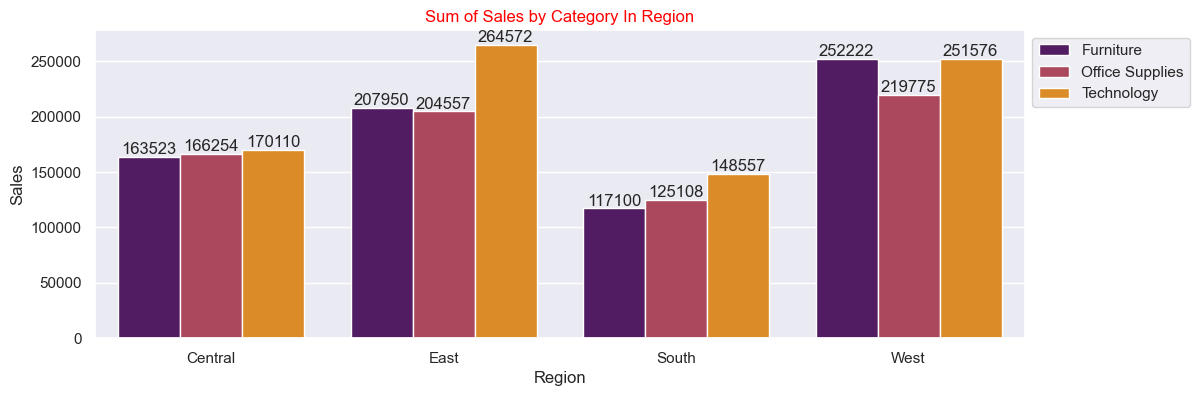

In [21]:
sales_data = df.groupby(["Region","Category"],as_index = False)["Sales"].sum()
plt.figure(figsize = (12,4))
ax = sns.barplot(x="Region",y="Sales",hue = "Category",data = sales_data,palette = "inferno")
for i in ax.containers:
    ax.bar_label(i)
plt.title("Sum of Sales by Category In Region",color = "red")
plt.legend(loc = "best",bbox_to_anchor = (1,1))
plt.show()

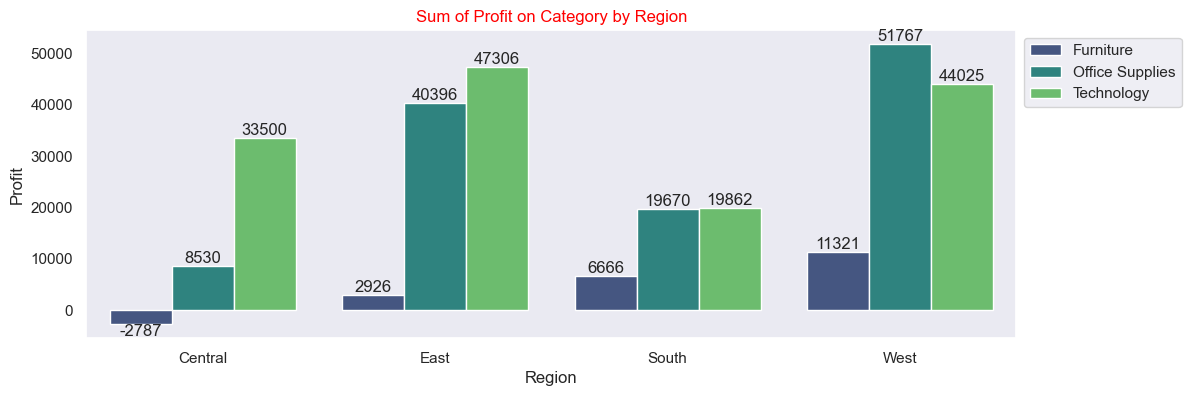

In [22]:
profit_data = df.groupby(["Region","Category"],as_index = False)["Profit"].sum()
sns.set(rc = {"figure.figsize":(12,4)})
ax = sns.barplot(x = "Region",y = "Profit",hue = "Category",palette = "viridis",data = profit_data)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Sum of Profit on Category by Region",color = "red")
plt.legend(loc = "best",bbox_to_anchor = (1,1))
plt.grid(False)
plt.show()

# According to above chart we can say that in West "Office Supplies" perform very well and also in "East".
# In Central "Furniture" is in loss and over all "Furniture" did not perform good.
# And all "Region","Technology" performance is outstanding.

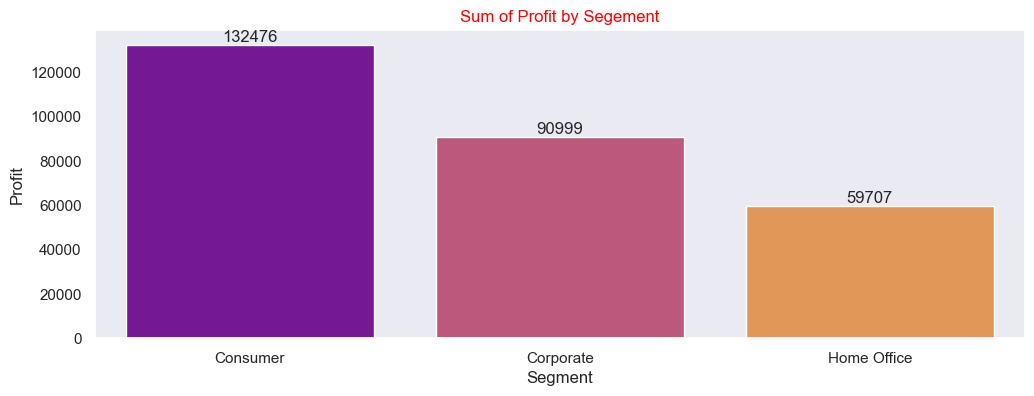

In [23]:
seg_sum = df.groupby(["Segment"],as_index = False)["Profit"].sum()
ax = sns.barplot(x = "Segment",y = "Profit",hue = "Segment",palette = "plasma",data = seg_sum)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Sum of Profit by Segement",color = "red")
plt.grid(False)
plt.show()

# In above chart we can understand that the Company  most profit generated segment is "Consumer".

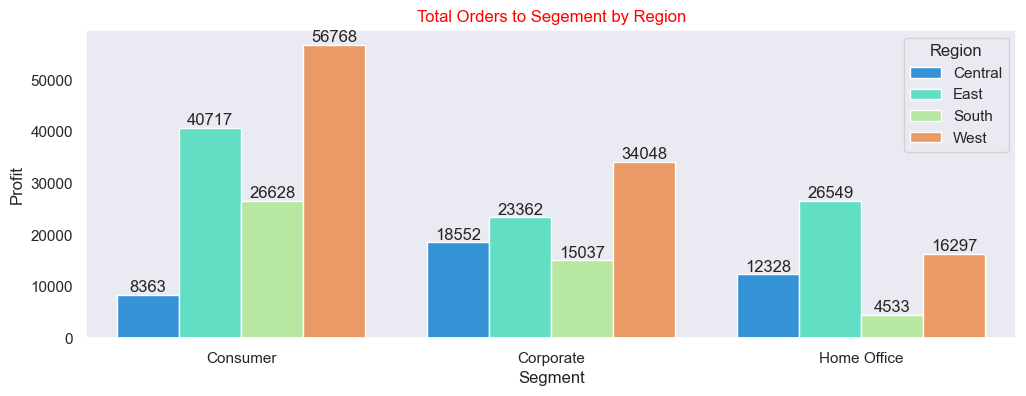

In [24]:
sum_of_profit_seg = df.groupby(["Segment","Region"],as_index = False)["Profit"].sum()
ax = sns.barplot(x = "Segment",y = "Profit",hue ="Region" ,palette = "rainbow",data = sum_of_profit_seg)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Total Orders to Segement by Region",color = "red")
plt.grid(False)
plt.show()

# According to above chart we can understand that In "Consumer" Segment company most gain from "West" Region.  

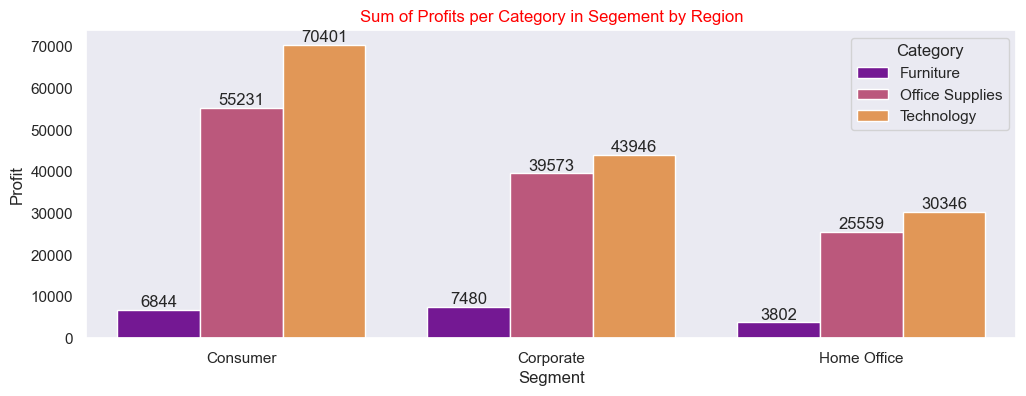

In [25]:
seg_prof_cat = df.groupby(["Segment","Category"],as_index = False)["Profit"].sum()
ax = sns.barplot(x = "Segment",y = "Profit",hue = "Category",palette = "plasma",data = seg_prof_cat)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Sum of Profits per Category in Segement by Region",color = "red")
plt.grid(False)
plt.show()

# According to above chart Company gain most profit in "Technology" Category.

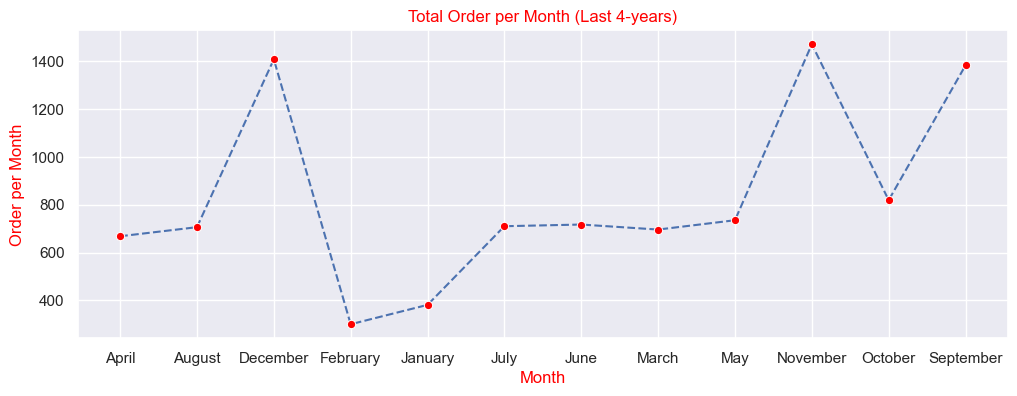

In [26]:
month_data = df.groupby(df["Order_Month"],as_index = False)["Order ID"].count()
sns.lineplot(x = "Order_Month",y = "Order ID",data = month_data,marker = "o",markerfacecolor = "red",linestyle = "dashed")
plt.title("Total Order per Month (Last 4-years)",color = "red")
plt.xlabel("Month",color = "red")
plt.ylabel("Order per Month",color = "red")
plt.show()

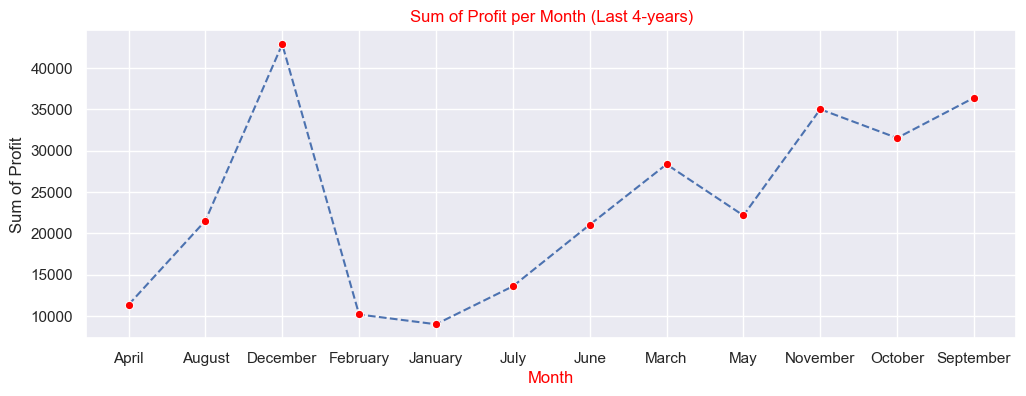

In [27]:
month_profit = df.groupby(df["Order_Month"],as_index = False)["Profit"].sum()
sns.lineplot(x = "Order_Month",y = "Profit",data = month_profit,marker = "o",markerfacecolor = "red",linestyle = "dashed")
plt.title("Sum of Profit per Month (Last 4-years)",color = "red")
plt.xlabel("Month",color = "red")
plt.ylabel("Sum of Profit")
plt.show()

# According to above chart we understand that every year in "December" the Company get more "order" and earn huge "Profit".
# "January" & "February" has less "Order" and "Profit".

In [30]:
df.head(2)

,Order ID,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Discount,Profit,Order_Month,Order_year
0,CA-2016-152156,Second Class,Consumer,South,Furniture,Bookcases,261,0,41,November,2016
1,CA-2016-152156,Second Class,Consumer,South,Furniture,Chairs,731,0,219,November,2016


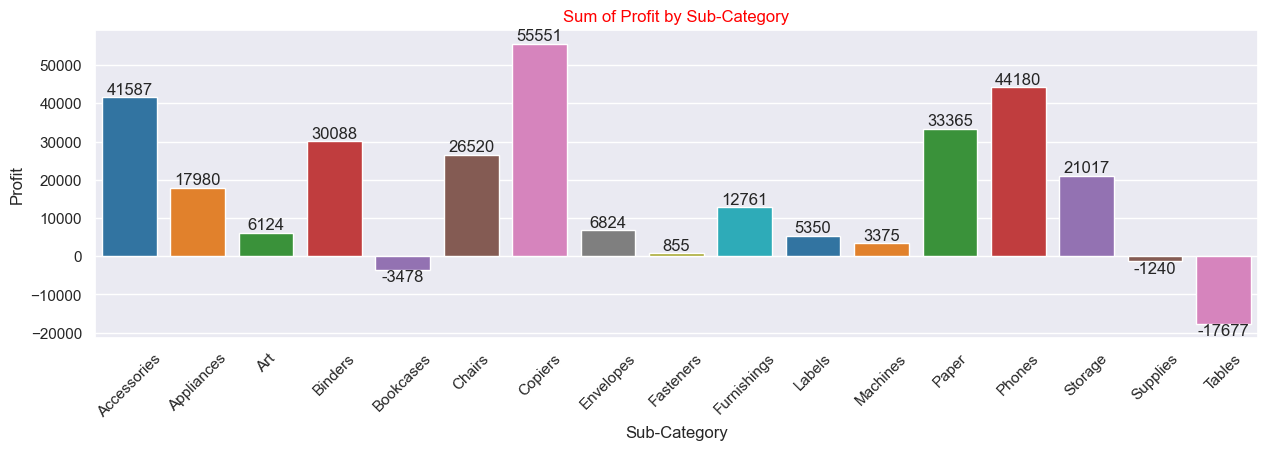

In [36]:
sub_profit = df.groupby(["Sub-Category"],as_index = False)["Profit"].sum()
sns.set(rc = {"figure.figsize":(15,4)})
ax = sns.barplot(x = "Sub-Category",y = "Profit",hue = "Sub-Category",data = sub_profit,palette = "tab10")
for i in ax.containers:
    ax.bar_label(i)
plt.title("Sum of Profit by Sub-Category",color = "red")
plt.xticks(rotation = 45)
plt.show()

# In above chart "Bookcase","Supplies" and "Tables",these three sub-category has "Negative" performance.

# Conclusion:- In Last 4-years, according to data most order comes to "Consumers-Segment" from "West-Region". Most Profitable product comes from "Technology-Category". Most horrible product comes from "Furniture-Category" which perform very bad and in "Central-Region" it has booked loss.